# <font color=#4863A0> Import Necessary Libraries📦</font>
This comment indicates that we are importing the necessary libraries for our machine learning code. These libraries include **pandas**, **numpy**, **matplotlib**, **seaborn**, and **scikit-learn**, which are commonly used for *data manipulation*, *analysis*, *visualization*, and *machine learning algorithms*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from termcolor import colored
print(colored("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...", "green"))

THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...


# <font color=#4863A0> Load The Dataset🔃</font>
This comment indicates that we are loading the **"winequality-red"** dataset into our program. The dataset will be stored in a pandas DataFrame called **"data"**.

In [2]:
# load data
filePath = r'..\input\winequality-red.csv'

# Read the CSV file and save it in "data" variable
data= pd.read_csv(filePath)

# Check loading data
print(colored("THE DATASET LOADED SUCCESSFUL...","green"))

THE DATASET LOADED SUCCESSFUL...


# <font color=#4863A0> Initial Information About The Dataset 🧪</font>
This comment signifies that we are going to display initial information of the dataset to get a glimpse of the data's structure and values.
- Displaying the first few rows of the dataset to get a glimpse of the data.
- Checking the shape of the dataset (number of rows and columns).
- Exploring the column names and data types.
- Perform descriptive analytics on the dataset, which includes statistical measures.

In [3]:
# Displaying the first 10 rows.
print(data.head(10))

print("________________________________________________________________________________")

# Show the shape of the dataset
x,y = data.shape
Number_Of_Features = y - 1
all_data = x * y
print(f"Number of Rows = {x} \nNumber of Columns = {y} \nNumber of features = {Number_Of_Features} \nNumber of all data = {all_data}")

print("________________________________________________________________________________")

# Get basic information
print(data.info())

print("________________________________________________________________________________")

# Descriptive Statistics of Numeric Variables
data.describe().T.style.background_gradient(cmap = "Blues")

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


# <font color=#4863A0> Data Cleaning 🧹</font>
Data cleaning refers to the process of **identifying**, **correcting**, and **removing errors**, **inconsistencies**, and **inaccuracies** from a dataset. It involves transforming raw data into a clean and structured format that is suitable for analysis, modeling, and other data-related tasks, including:
- Handling Missing Values
- Handling Outliers
- Handling Duplicates

<font size="4" face="WildWest">1. Handling Missing Values</font>

In [4]:
# Check for missing values
chNull = data.isnull().sum() 
print(chNull)

print("_________________________________________________________________")
print("Totally, there are {} null values in the dataset.".format(chNull.sum()))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
_________________________________________________________________
Totally, there are 0 null values in the dataset.


<font size="4" face="WildWest">2. Handling Outliers</font>

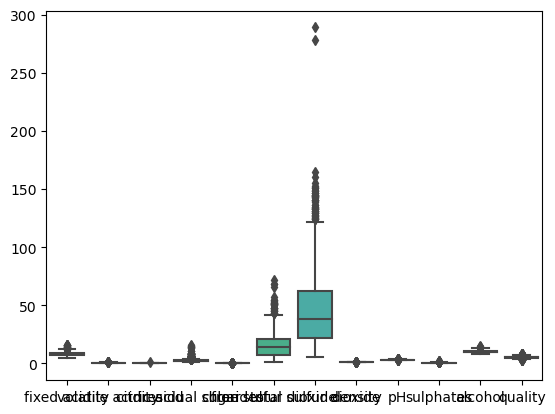

In [5]:
# Visualizing outliers
sns.boxplot(data=data)
plt.show()

<font size="4" face="WildWest">3. Handling Duplicates</font>

In [6]:
# Checking for duplicate entries
print(data.duplicated().sum())

240


# <font color=#4863A0> Data Exploration 🔍</font>
Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Graphical Analysis
- Statistical Summary
- Correlation Analysis

<font size="4" face="WildWest">1.  Graphical analysis</font>

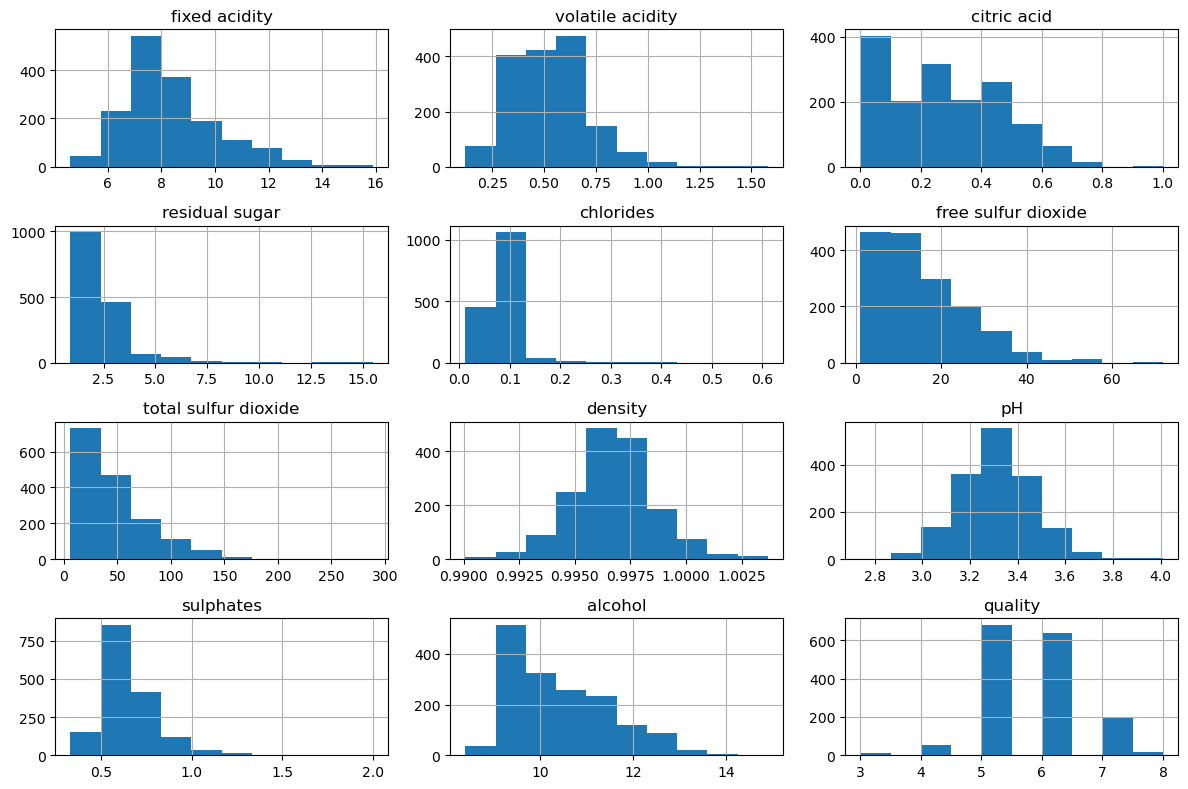

In [7]:
# Histograms
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

<font size="4" face="WildWest">2. Statistical Summary</font>

In [8]:
# Show the description of dataset
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<font size="4" face="WildWest">3. Correlation Analysis</font>

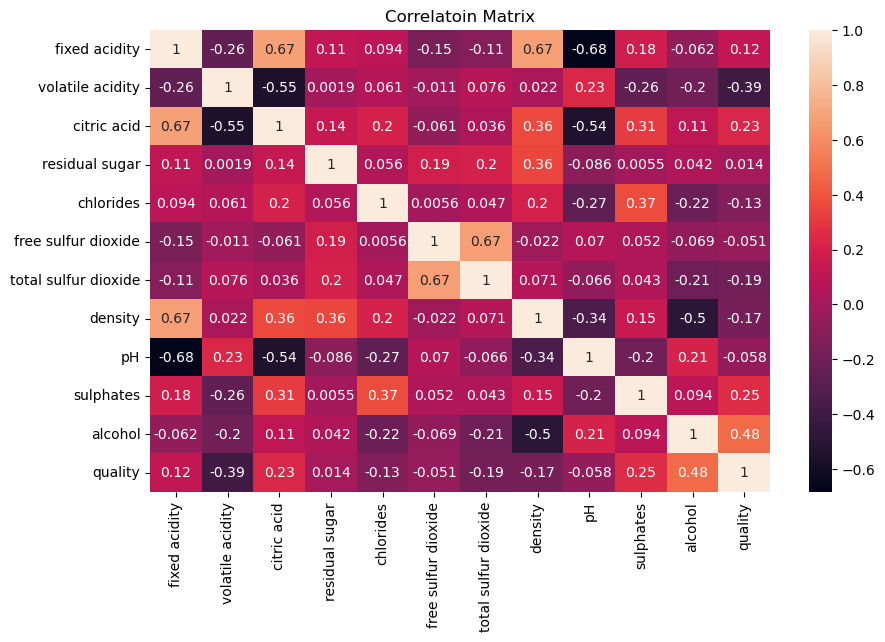

In [9]:
# Correlation analysis
correlation = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True)
plt.title("Correlatoin Matrix")
plt.show()

# <font color=#4863A0> Data Preprocessing 👨‍💻</font>
It involves *preparing* and *transforming raw data* into a suitable format for analysis and **model training**. Effective data processing ensures that the machine learning algorithms can extract meaningful patterns and make accurate predictions, includes:
- Splitting the Dataset
- Scaling or Normalizing the Features
- Encoding Categorical Variables

In [10]:
# Split the data into features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# <font color=#4863A0> Model Selection 🧩</font>
Model selection is an essential step in machine learning that involves choosing the most appropriate model for a given problem. The goal of model selection is to find a model that generalizes well to unseen data and provides the best performance on the task at hand.

- Choosing the Machine Learning Algorithm.
    1. Random Forest Classifier (Model Selection)  
- Split the data into training and testing sets.
- Traning the Model.

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

# <font color=#4863A0> Model Evaluation 📝</font>

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.30123812499999997
R2 Score: 0.5390429623873638


# <font color=#4863A0> Final Model Deployment ✅</font>

In [13]:
# Making predictions on new, unseen data
new_data = X_scaled[:5]  # Example: Predicting the quality of the first 5 records
predictions = model.predict(new_data)
print("Predictions:", predictions)

Predictions: [4.46 4.08 4.32 4.93 4.46]


D:\Apps\Anaconda\package\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
